<a href="https://colab.research.google.com/github/vishant016/140_VISHANT/blob/main/LAB8/LAB8_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
dataset=datasets.load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
prediction = kmeans.fit_predict(dataset.data)
prediction

array([6, 6, 6, 4, 6, 0, 1, 5, 0, 0, 8, 8, 1, 5, 0, 5, 8, 8, 7, 0, 0, 9,
       5, 7, 7, 1, 5, 1, 8, 8, 1, 5, 8, 6, 8, 8, 5, 4, 0, 0, 0, 4, 1, 5,
       0, 1, 9, 0, 4, 0, 4, 0, 4, 1, 5, 4, 7, 5, 0, 9, 9, 9, 5, 9, 5, 5,
       9, 4, 9, 4, 6, 9, 1, 5, 0, 8, 0, 1, 6, 0, 4, 0, 3, 1, 4, 1, 5, 1,
       4, 5, 5, 5, 5, 0, 5, 6, 4, 9, 4, 5, 5, 9, 4, 9, 9, 5, 4, 4, 7, 4,
       9, 4, 0, 9, 9, 4, 9, 8, 8, 8, 4, 1, 7, 0, 0, 0, 5, 1, 5, 1, 4, 8,
       8, 5, 1, 0, 4, 4, 5, 4, 9, 8, 4, 0, 4, 4, 4, 5, 5, 0, 0, 9, 9, 4,
       0, 4, 8, 8, 4, 4, 4, 1, 7, 4, 7, 5, 9, 8, 1, 5, 4, 5, 8, 9, 9, 9,
       9, 5, 0, 4, 3, 7, 8, 4, 5, 9, 1, 4, 4, 4, 0, 0, 9, 0, 5, 0, 5, 8,
       6, 5, 0, 8, 7, 8, 0, 5, 9, 8, 0, 5, 6, 4, 3, 8, 5, 0, 4, 9, 6, 7,
       0, 0, 9, 8, 0, 5, 9, 5, 0, 0, 8, 4, 4, 6, 9, 0, 3, 6, 5, 1, 0, 4,
       4, 0, 1, 9, 0, 0, 4, 4, 7, 4, 6, 8, 6, 5, 6, 5, 8, 5, 6, 8, 8, 5,
       1, 3, 9, 0, 0, 9, 0, 4, 7, 9, 8, 4, 4, 8, 0, 0, 6, 4, 1, 8, 0, 4,
       4, 0, 4, 4, 5, 5, 0, 4, 4, 0, 9, 4, 5, 9, 7,

In [ ]:
kmeans.cluster_centers_.shape

(10, 30)

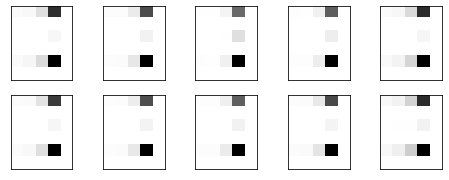

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.8892794376098418

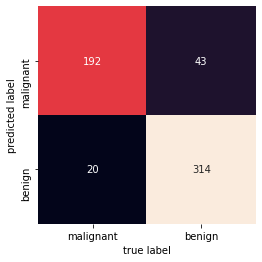

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');